## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset
<p>Konteks:</p>
<p>Untuk mempelajari lebih lanjut tentang Algoritma SVM dan khususnya Regresi, saya telah mengunduh kumpulan data Penilaian Real Estat dari Repositori Pembelajaran Mesin UCI.</p>
<p>Ini adalah Kumpulan Data yang diunduh dari Repositori Pembelajaran Mesin UCI.<p>
<p>Deskripsi sesuai situs UCI : Kumpulan data historis pasar penilaian real estat dikumpulkan dari Sindian Dist., New Taipei City, Taiwan.<p>

Informasi Atribut:
The inputs are as follows
* X1 the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2 the house age (unit: year)
* X3 the distance to the nearest MRT station (unit: meter)
* X4 the number of convenience stores in the living circle on foot (integer)
* X5 the geographic coordinate, latitude. (unit: degree)
* X6 the geographic coordinate, longitude. (unit: degree)

The output is as follow
* Y house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

### Studi Kasus
bagaimana pengaruh jarakk rumah ke station MRT terhadapa harga rumah per meter.

## Import Libary dan Baca dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Baca dataset
house_df = pd.read_excel("dataset/UCI_Real_Estate_Valuation.xlsx")
house_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Preprocessing Data

In [3]:
# informasi umum kolom pada dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# Remane kolom pada dataset agar lebih mudah dipahami
house_df.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_of_Store",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)

In [5]:
# informasi statistik dari dataset
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.000000,104.250000,207.500000,310.750000,414.000000
Transaction_Date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House_Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Num_of_Store,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
Latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
Longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Target,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [6]:
# cek apakah ada missing value pada dataset
house_df.isnull().sum()

No                  0
Transaction_Date    0
House_Age           0
Distance            0
Num_of_Store        0
Latitude            0
Longitude           0
Target              0
dtype: int64

In [7]:
# cek apakah ada duplikat data pada dataset
house_df.duplicated().sum()

0

In [8]:
# drop kolom No dan Transaction_Date karena tidak terlalu penting pada analisis
house_df.drop(['No','Transaction_Date'], axis=1, inplace=True)

In [9]:
# dataset setelah di drop kolom No dan Transaction_Date
house_df.head(5)

,House_Age,Distance,Num_of_Store,Latitude,Longitude,Target
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


<Axes: >

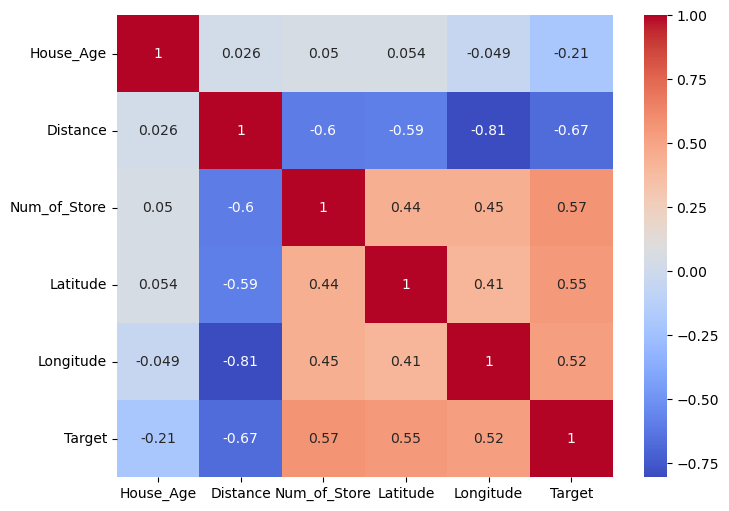

In [10]:
# korelasi antar kolom pada dataset
df_cor =house_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

kolom house age dan distance memiliki korelasi negatif yang cukup kuat. sedangkan num of store memiliki korelasi positif yang cukup kuat

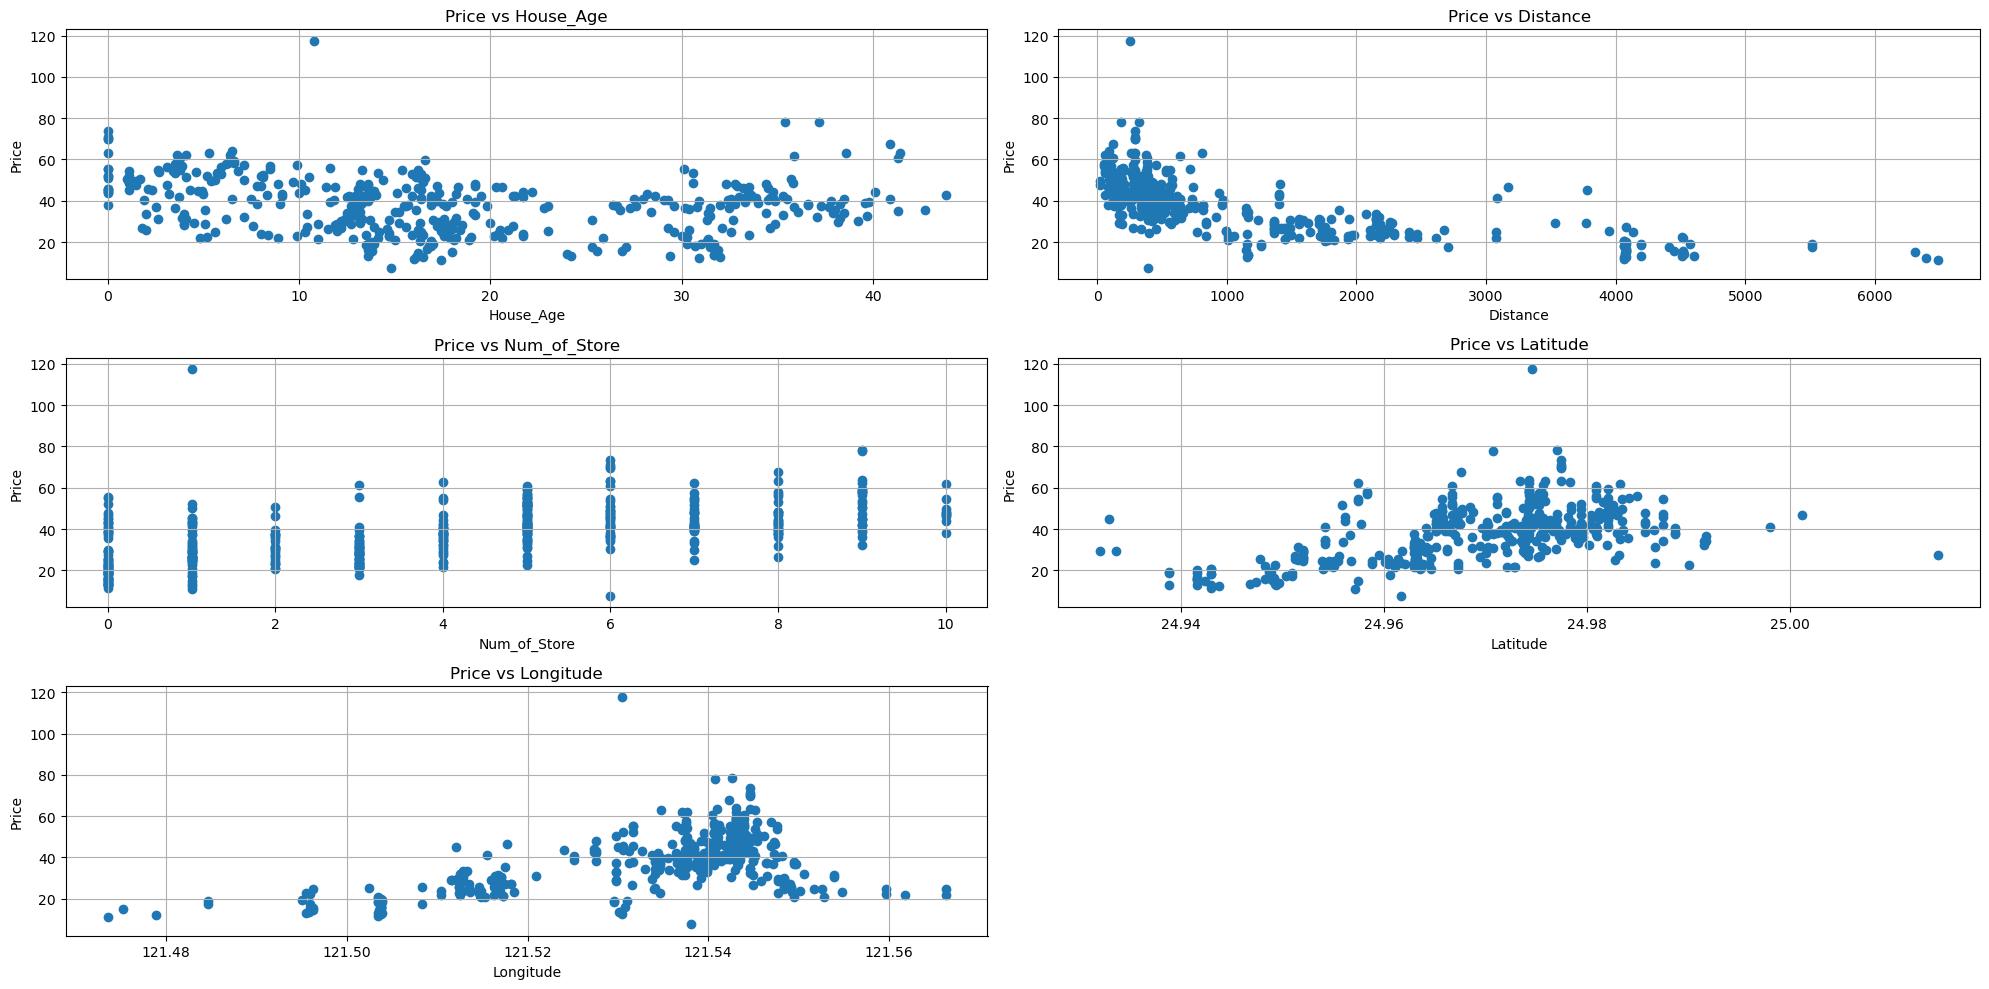

In [11]:
# plot price vs other features
plt.figure(figsize=(20,10))
features = ['House_Age', 'Distance', 'Num_of_Store', 'Latitude', 'Longitude']
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.scatter(house_df[features[i]], house_df['Target'])
    plt.title('Price vs ' + features[i])
    plt.xlabel(features[i])
    plt.ylabel('Price')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

Dapat dilihat pada plot diatas bahwa price memiliki korelasi yang cukup kuat dengan Distance secara negatif yang berarti semakin jauh jarak ke stasiun MRT maka harga akan semakin murah

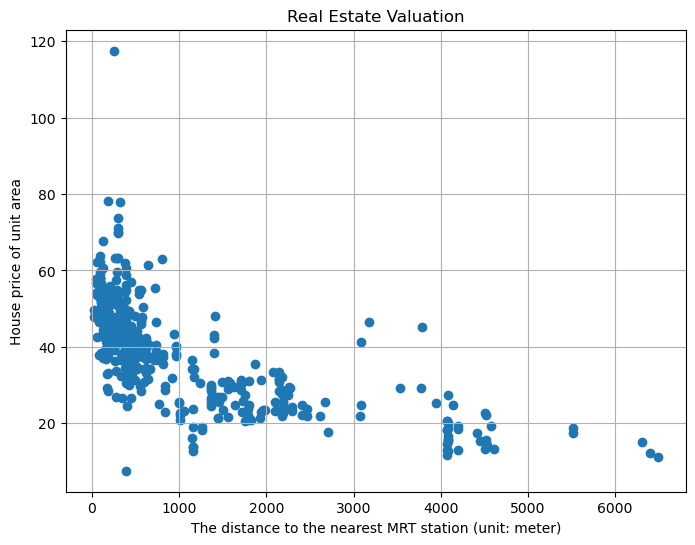

In [12]:
# plot price vs distance to the nearest MRT station
plt.figure(figsize=(8,6))
plt.scatter(house_df['Distance'], house_df['Target'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.grid(True)
plt.show()

In [13]:
# drop kolom Latitude dan Longitude karena tidak terlalu penting pada analisis
house_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

## Split dataset dan normalisasi data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = house_df.drop('Target', axis=1)
y = house_df['Target']

# Scaling the data independent variable
x_scaled = scaler.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [15]:
from sklearn import metrics

# Fungsi untuk menampilkan hasil evaluasi model
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

## Membangun Model 

In [16]:
from sklearn.svm import SVR

# Instantiate SVR with polynomial kernel
svr_poly = SVR(kernel='poly', C=10, gamma=0.1,coef0=1,epsilon=0.2, degree=3)

# Train SVR model
svr_poly.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr_poly.predict(X_test)

# Evaluate the model
print_evaluate(y_test, y_pred) 


MAE: 4.552312643851499
MSE: 45.143622545136424
RMSE: 6.718900397024533
R2 Square 0.7309031277185374
__________________________________


membangun model prediksi svr dengan kernel polynom berderajt 3. menghasilkan prediksi yang baik dengan skor 
* MAE: 4.552312643851499
* MSE: 45.143622545136424
* RMSE: 6.718900397024533
* R2 Square 0.7309031277185374

## Visualisasi Model 

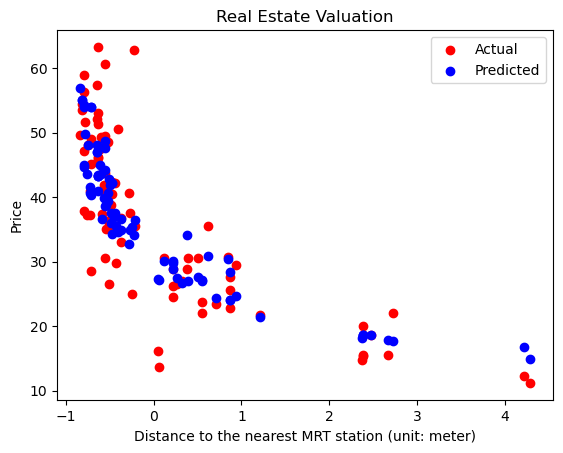

In [17]:
# Scatter plot of test data dan predicted data
plt.scatter(X_test[:,1], y_test, color='red', label='Actual')
plt.scatter(X_test[:,1], y_pred, color='blue', label='Predicted')
plt.title('Real Estate Valuation')
plt.xlabel('Distance to the nearest MRT station (unit: meter)')
plt.ylabel('Price')
plt.legend()
plt.show()


dari hasil plot diatas, model SVR dengan kernel polynomial cukup baik dalam memprediksi harga rumah berdasarkan jarak ke stasiun MRT terdekat

Polynomial equation:
         3         2
-0.8127 x + 5.984 x - 14.86 x + 32.19


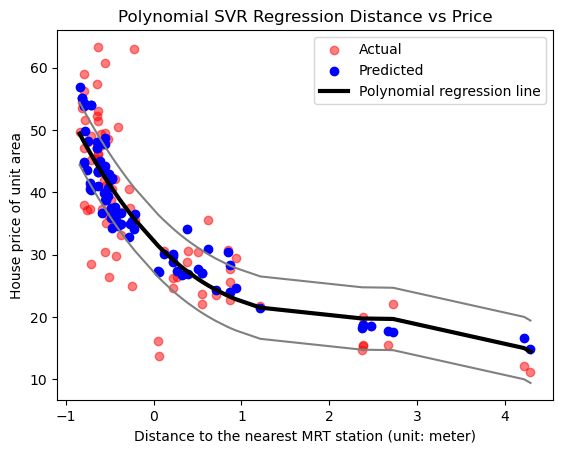

In [20]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test[:,1], axis=0)
X_test_sorted = X_test[:,1][sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test[:,1], y_test,alpha=0.5, color='red', label='Actual')
plt.scatter(X_test[:,1], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted)-5, color='gray', )
plt.plot(X_test_sorted, polynomial(X_test_sorted)+5, color='gray')
plt.title('Polynomial SVR Regression Distance vs Price') 
plt.xlabel('Distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.legend()
plt.show()


* persamaan polinomial yang dihasilkan adalah: -0.8127x^3 + 5.984x^2 - 14.86x + 32.19
* persamaan tersebut menunjukkan bahwa semakin jauh jarak ke stasiun MRT maka harga rumah akan semakin murah

### mencoba hyperparameter tuning

In [21]:
# buat hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1], 
              'coef0': [0.1, 1, 10],
              'epsilon': [0.1, 0.2, 0.3]
              }

poly_svr = SVR(kernel='poly', degree=3)
grid_search = GridSearchCV(poly_svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# best hyperparameters
grid_search.best_params_

# best model
best_poly_svr = grid_search.best_estimator_

# Predict using the best model
y_pred = best_poly_svr.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon=0.2, gamma=1; total time=   0.0s
[CV] END .............C=0.1, coef0=0.1, epsilon

In [22]:
# print the best parameter of gridsearch
print_evaluate(y_test, y_pred)
print(grid_search.best_params_)

MAE: 4.503256664468895
MSE: 42.84303723952399
RMSE: 6.545459284078084
R2 Square 0.7446166995422876
__________________________________
{'C': 100, 'coef0': 1, 'epsilon': 0.1, 'gamma': 0.1}


Polynomial equation:
        3         2
-1.027 x + 7.141 x - 16.28 x + 31.79


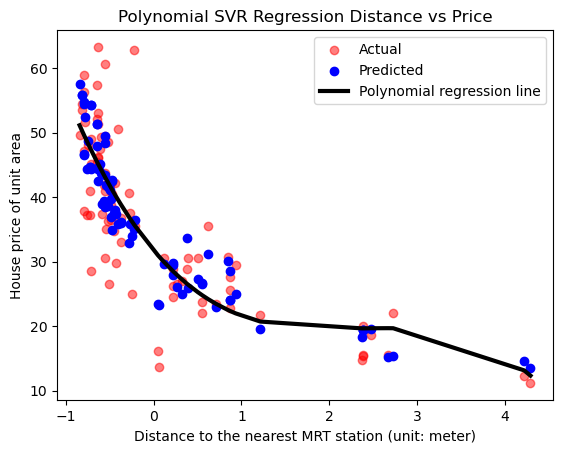

In [23]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test[:,1], axis=0)
X_test_sorted = X_test[:,1][sorted_indices].reshape(-1,1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test[:,1], y_test,alpha=0.5, color='red', label='Actual')
plt.scatter(X_test[:,1], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.title('Polynomial SVR Regression Distance vs Price') 
plt.xlabel('Distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.legend()
plt.show()
